In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

# load data, skip the top 20 and bottom 2 rows as they do not contain relevant data
data = pd.read_excel('canada.xlsx',sheet_name = 'Canada by Citizenship',skiprows = range(20),
                     skipfooter = 2)

#data

In [2]:
# Data Preparation

# conversion index and columns to lists
data.columns.tolist()
data.index.tolist()

# remove unnecessary columns
data.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)

# rename some columns 
data.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)

# convert all column names to strings
data.columns = list(map(str, data.columns))

# full range of the time series
years = list(map(str, range(1980, 2014)))

# add Total column
data['Total'] = data.sum(axis=1)
#data

In [3]:
#  1

# index data by country
data.set_index('Country', inplace=True)
asia_data = data.loc[data.Continent == "Asia"]
# sort data by Total
asia_data.sort_values(by='Total', ascending=False, axis=0, inplace=True)

# pick top 5 contibutors
print('Top 5 asian countries Immigrating to canada: \n{0}'.format(str(asia_data.index[:5])))
#asia_data.index[:5]

Top 5 asian countries Immigrating to canada: 
Index(['India', 'China', 'Philippines', 'Pakistan', 'Iran'], dtype='object', name='Country')


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


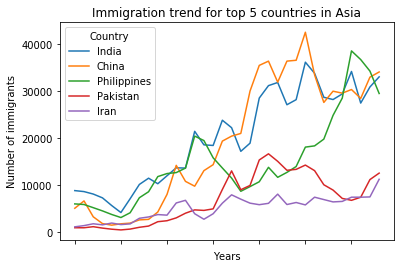

In [4]:
# 2

top_asia_df = data.loc[asia_data.index[:5], years]

top_asia_df.transpose().plot(kind = 'line')
plt.title('Immigration trend for top 5 countries in Asia')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')

plt.show()

In [5]:
# 3

others = data.sum() - top_asia_df.sum()
top_asia_df.loc["Others", :] = np.NAN
for i in range(1980, 2014):
    top_asia_df.loc["Others"][i - 1980] = int(others[i - 1980])
#top_asia_df

In [6]:
# add Total column
top_asia_df['Total'] = top_asia_df.sum(axis=1)
#top_asia_df['Total']

In [7]:

# This takes the sorted dataframe 'asia_data' and calculates the fraction each country contributes
fraction = asia_data.iloc[:,3:].divide(asia_data.iloc[:,3:].sum(axis = 0), axis = 1)

# Slicing so that we get only the top 5 countries
df_fraction = fraction.iloc[:5,:]
df_fraction

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,0.286221,0.252667,0.269643,0.297133,0.209137,0.176562,0.248791,0.235840,0.242804,0.171651,...,0.227374,0.227085,0.215362,0.202017,0.208267,0.208947,0.187271,0.203215,0.213361,0.208543
China,0.165125,0.194731,0.109486,0.075437,0.055987,0.076143,0.068200,0.061176,0.058119,0.071744,...,0.267398,0.224872,0.207120,0.214713,0.209440,0.185486,0.194031,0.216952,0.220081,0.198916
Philippines,0.195036,0.172553,0.173727,0.184726,0.139363,0.132075,0.144960,0.170359,0.182050,0.196910,...,0.113901,0.123445,0.148637,0.177899,0.202024,0.235692,0.250283,0.225433,0.190514,0.154136
Pakistan,0.031523,0.028327,0.039750,0.036443,0.024492,0.021551,0.024044,0.024813,0.028111,0.037523,...,0.089882,0.088069,0.075859,0.064292,0.051027,0.041570,0.050839,0.073756,0.081270,0.072819
Iran,0.037776,0.041645,0.060303,0.064464,0.072487,0.069099,0.062424,0.069185,0.068972,0.062749,...,0.036652,0.050183,0.052256,0.046285,0.046523,0.045635,0.050914,0.049495,0.072810,0.053024


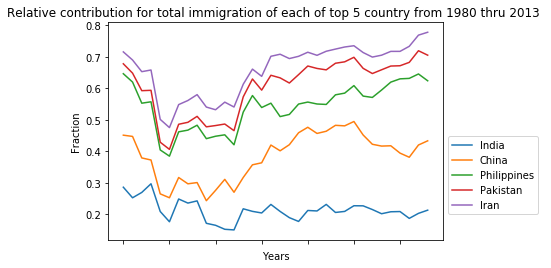

In [8]:
#  Visualizing the amount contributed using the same graph as for question 2
df_fraction[years].transpose().plot(kind='line', stacked=True)

plt.title('Relative contribution for total immigration of each of top 5 country from 1980 thru 2013 ')
plt.ylabel('Fraction')
plt.xlabel('Years')
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 0.5))

plt.show()

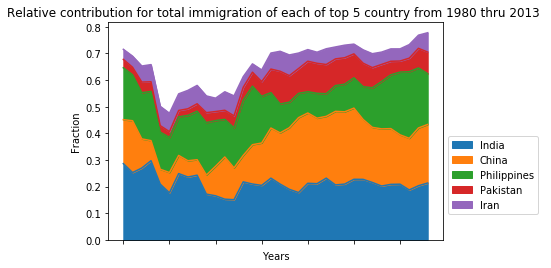

In [9]:
#  Alternative

df_fraction[years].transpose().plot(kind='area', stacked=True)

plt.title('Relative contribution for total immigration of each of top 5 country from 1980 thru 2013 ')
plt.ylabel('Fraction')
plt.xlabel('Years')
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 0.5))

plt.show()